In [3]:
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
meta = unpickle('../data/cifar-10-batches-py/batches.meta')

data_batch_1 = unpickle('../data/cifar-10-batches-py/data_batch_1')
test_batch = unpickle('../data/cifar-10-batches-py/test_batch')

In [18]:
np.max(test_batch[b'data'][0])

np.uint8(255)

In [120]:
W = np.random.randint(0, 255, (10, 32 * 32 * 3))
W

array([[ 10, 239, 208, ..., 147,   4,  46],
       [ 55, 137,  69, ..., 204, 142, 198],
       [205, 185,  92, ..., 188,  29, 129],
       ...,
       [158,  69,  16, ..., 219,  81, 126],
       [116,   8,  91, ...,  88, 194, 160],
       [110,  98, 148, ...,   3, 165,  17]])

In [126]:
def train(W, X, Y, eps):
    delta = 5
    for i in range(X.shape[0]): 
        if i % 500 == 0:
            print(f'{i} of {X.shape[0]}')
        L = 100
        while L > eps:
            x = X[i]
            res = (W/255).dot(x)
            # print(res)
            ind = Y[i]
            for j in range(W.shape[0]):
                r = np.random.randint(0, W.shape[1])
                if (j != ind):
                    W[j][r] = max(0, W[j][r] - delta)
                else:
                    W[j][r] = min(255, W[j][r] + delta)
            after = (W/255).dot(x)
            L = after[ind]/(np.sum(np.concatenate([after[:ind], after[ind:]])))
            # print(L)
        # print(L)
    return W

WW = train(W, data_batch_1[b'data'], data_batch_1[b'labels'], 0.1)

0 of 10000


KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..14.024999999999956].


array([0., 0., 0., ..., 0., 0., 0.])

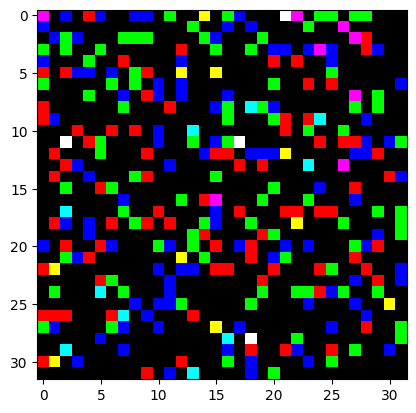

In [118]:
plt.imshow(np.rot90((WW[1].flatten().reshape(3, 32, 32).T + 1.0)* (255/2), -1))
(WW[4] + 1.0)* (255/2)

In [149]:
a = np.array([[1, 2], [8, 9]])
b = np.array([[1, 1]])

np.sqrt(np.sum(np.pow(a - b, 2), axis = 1)

TypeError: sum() got multiple values for argument 'axis'